In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [5]:
import yfinance as yf

In [6]:
df = yf.download('BTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [7]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-11-13,37070.304688,37405.117188,36399.605469,36502.355469,36502.355469,19057712790
2023-11-14,36491.789062,36753.351562,34948.500000,35537.640625,35537.640625,23857403554
2023-11-15,35548.113281,37964.894531,35383.781250,37880.582031,37880.582031,27365821679


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

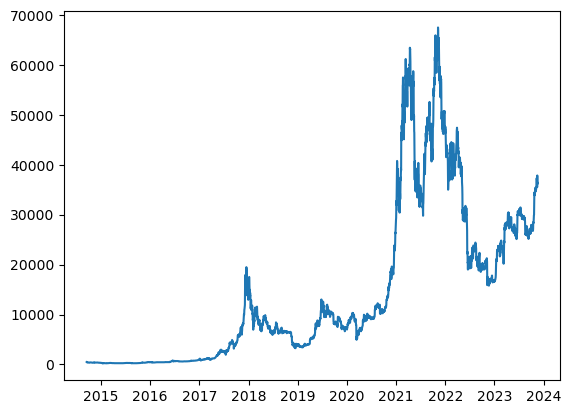

In [9]:
plt.plot(df.index, df['Adj Close'])
plt.show()

In [11]:
int(len(df)*0.9)

3014

In [14]:
#Train Test Split

to_row = int(len(df)*0.9)
training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])


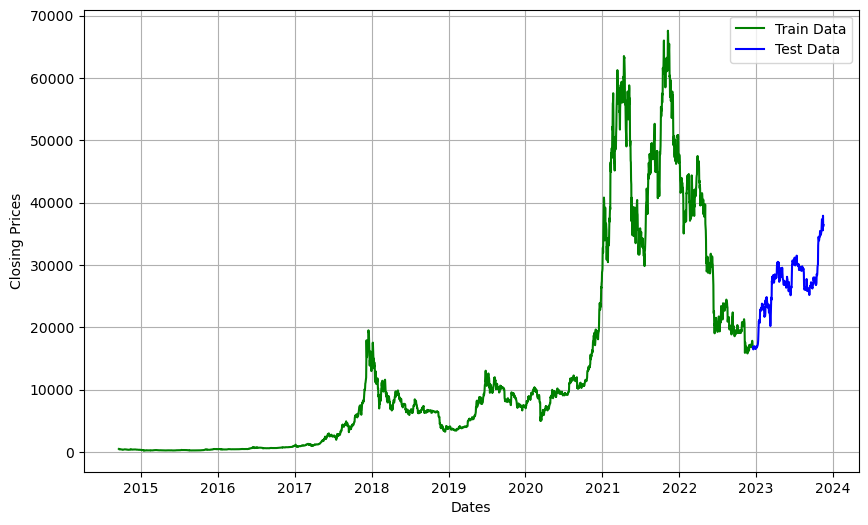

In [15]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'], 'green', label = 'Train Data')
plt.plot(df[to_row:]['Adj Close'], 'blue', label = 'Test Data')
plt.legend()

In [16]:
model_predictions = []
n_test_obser = len(testing_data)


In [30]:
 for i in range(n_test_obser):
    model = ARIMA(training_data, order=(4, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

In [32]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3349
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -27039.650
Date:                Fri, 17 Nov 2023   AIC                          54089.301
Time:                        17:00:36   BIC                          54119.881
Sample:                             0   HQIC                         54100.239
                               - 3349                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0255      0.009     -2.830      0.005      -0.043      -0.008
ar.L2          0.0093      0.009      1.076      0.282      -0.008       0.026
ar.L3          0.0218      0.009      2.349      0.0

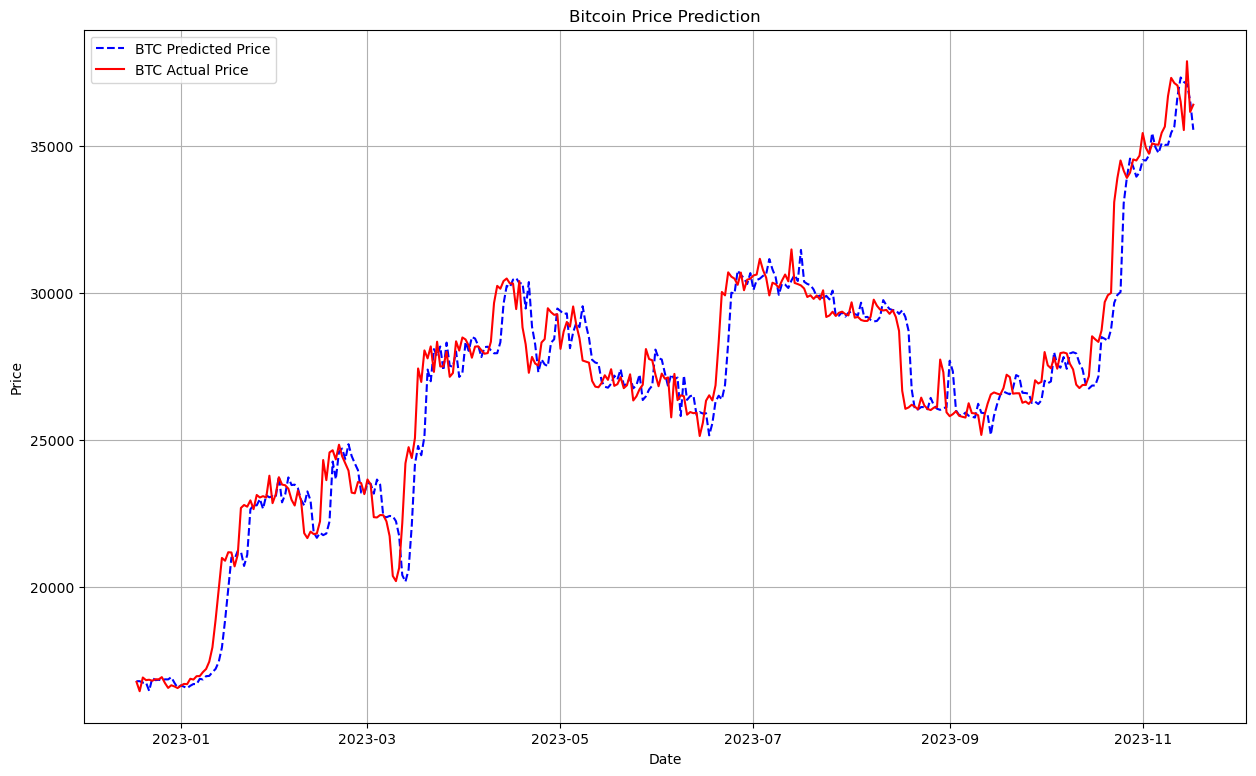

In [40]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df[to_row:].index
plt.plot(date_range, model_predictions[:-2], color = 'blue', linestyle = 'dashed', label = 'BTC Predicted Price')
plt.plot(date_range, testing_data, color = 'red', label = 'BTC Actual Price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [36]:
len(testing_data)

335

In [37]:
len(model_predictions)

337

In [43]:
#report performance

mape = np.mean(np.abs(np.array(model_predictions[:-2]) - np.array(testing_data))/np.abs(testing_data))
print('MAPE: ' +str(mape)) #mean absolute percentage error

#around 2.6% MAPE(mean absolute percentage error) implies the model is about 97.4% accurate in predicting the 
#test set observations.

MAPE: 0.02635140127341131
